## An exact algorithm for the Maximum Leaf Spanning Tree problem

The Maximum Leaf Spanning Tree (MLST) problem, which asks to find, for a given graph, a spanning tree with as many leaves as possible, is one of the classical NP-complete problems. Ongoing research on this topic is motivated by the fact that variants of this problem occur frequently in real life applications. For example, some broadcasting problems in network design ask to minimize the number of broadcasting nodes, which must be connected to a single root. This translates nicely into finding a spanning tree with many leaves and few internal nodes. 

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import operator

In [2]:
def sub(list1,list2):
    return [item for item in list1 if item not in list2]

In [3]:
def intersection(list1, list2):
    return [value for value in list1 if value in list2]

In [4]:
def isUnreachable(G, Free, FL, BN, v):
    isPath = False
    for u in BN:
        H = G.subgraph(Free+FL+[u])
        if nx.has_path(H,u,v): 
            isPath = True
#             print("path exists")
#         else:
#             print("path doesn't exist")
    return not isPath

In [5]:
def N(v,G):
    return [n for n in G.neighbors(v)]

In [6]:
def N_X(v,G,X):
    return [value for value in N(v,G) if value in X]

In [7]:
def d(v,G,IN,BN,LN,FL,Free):
    if v in BN:
        return len([value for value in N(v,G) if value in Free+FL])
    elif v in Free:
        return len([value for value in N(v,G) if value in Free+FL+BN])
    elif v in FL:
        return len([value for value in N(v,G) if value in Free+BN])
    else:
        return 0;

In [24]:
def algo(G,IN,BN,LN,FL,Free):
    print("Starting with Graph")
    print("IN =",IN)
    print("BN =",BN)
    print("LN =",LN)
    print("FL =",FL)
    print("Free =",Free)
    
    # if there is some unreachable v∈ Free∪ FL, then return 0 
    for v in Free+FL:
        #checking unreachibility
        result = isUnreachable(G,Free,FL,BN,v)
        if result:
            print("final Graph:")
            print("IN =",IN)
            print("BN =",BN)
            print("LN =",LN)
            print("FL =",FL)
            print("Free =",Free)
            return 0;
    if (list(G.nodes)==IN+LN):
        print("final Graph LN:")
        print("IN =",IN)
        print("BN =",BN)
        print("LN =",LN)
        print("FL =",FL)
        print("Free =",Free)
        return len(LN)
    # choose vertex v of max degree in BN
    degreeDict = {k : G.degree[k] for k in BN}
    v = max(degreeDict.items(), key=operator.itemgetter(1))[0]
    print (v)
    degree = d(v,G,IN,BN,LN,FL,Free)
    print(degree)
    if (degree>=3) or (degree==2 and len(N_X(v,G,FL))!= 0):
        algo(G,IN,[u for u in BN if u!=v],LN+[v],FL,Free)
        algo(G,IN+[v],[u for u in BN if u!=v],LN,FL,Free)
    elif (degree == 2):
        [x1,x2] = N_X(v,G,Free)
        if(d(x1,G,IN,BN,LN,FL,Free)<d(x2,G,IN,BN,LN,FL,Free)):
            temp = x2
            x2 = x1
            x1 = temp
        if d(x1,G,IN,BN,LN,FL,Free)==2:
            [z] = N(x1,G).remove(v)
            if z in Free:
                algo(G,IN,[u for u in BN if u!=v],LN+[v],FL,Free)
                algo(G,IN+[v,x1],[u for u in BN if u!=v],LN,FL,[u for u in Free if u!=x1])
                algo(G,IN+[v],[u for u in BN if u!=v],LN+[x1],FL,[u for u in Free if u!=x1])
            elif z in FL:
                algo(G,IN+[v],[u for u in BN if u!=v],LN,FL,Free)
        elif [v]==(sub(intersection(N(x1,G),N(x2,G)),FL)) and (d(z,G,IN,BN,LN,FL,Free)>=3 for z in intersection(N_X(x1,G,FL),N_X(x2,G,FL))):
            algo(G,IN,[u for u in BN if u!=v],LN+[v],FL,Free)
            algo(G,IN+[v,x1],[u for u in BN if u!=v],LN,FL,[u for u in Free if u!=x1])
            algo(G,IN+[v,x2],[u for u in BN if u!=v],LN+[x1],FL,[u for u in Free if u not in [x1,x2]])
            
            algo(G,IN+[v], #IN
                 [u for u in BN if (u!=v and u not in sub(list(set(N_X(x1,G,BN)+N_X(x2,G,BN))),[v]))], #BN
                 LN+[x1,x2]+list(set(N_X(x1,G,BN)+N_X(x2,G,BN))), #LN
                 list(set(N_X(x1,G,Free)+N_X(x2,G,Free)+FL)), #FL
                 sub(Free,list(set(N_X(x1,G,Free)+N_X(x2,G,Free)))))#FREE
        else:
            algo(G,IN,[u for u in BN if u!=v],LN+[v],FL,Free)
            algo(G,IN+[v,x1],[u for u in BN if u!=v],LN,FL,[u for u in Free if u!=x1])
            algo(G,IN+[v,x2],[u for u in BN if u!=v],LN+[x1],FL,[u for u in Free if u not in [x1,x2]])
    elif degree == 1:
#         print("------------Remaining----------------")
        free_graph = G.subgraph(Free+[v])
        max_ = 0
        for u in Free:
            if(d(u,G,IN,BN,LN,FL,Free)==2):
                path = max(nx.all_simple_paths(G, source=v, target=u))
                len_ = len(path)
                if(max_ <  len_):
                    max_ = len_
                    vk = u
                    max_path = path
        z = sub(N(vk,G),path)[0]
        deg_z = d(z,G,IN,BN,LN,FL,Free)
        if (z in FL and deg_z == 1):
             algo(G,IN+path,[u for u in BN if u!=v],LN+[z],FL,sub(Free,path+[z]))
        elif (z in FL and deg_z >1):
            algo(G,IN+sub(path,[vk]),[u for u in BN if u!=v],LN+[vk],FL,sub(Free,path))
        elif (z in BN):
            algo(G,IN,[u for u in BN if u!=v],LN+[v],FL,Free)
        elif (z in Free):
            algo(G,IN+path,[u for u in BN if u!=v],LN+[z],FL,sub(Free,path+[z]))
            algo(G,IN,[u for u in BN if u!=v],LN+[v],FL,Free)
        else:
            print("lite")
    else:
        print(degree)
        print("lite max")

            
            

In [25]:
G = nx.empty_graph()
G.add_nodes_from(['a','b','c','d','e'])
G.add_edges_from([('a', 'b'), ('a', 'e'),('b', 'e'),('b', 'c'),('b', 'd')
                  ,('c', 'd'),('d','e')])

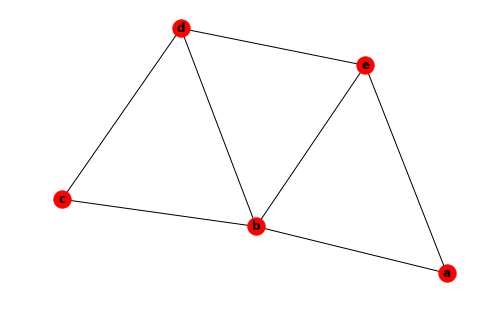

In [26]:
nx.draw(G, with_labels=True, font_weight='bold')

In [27]:
IN = ['a']
Free = ['c','d']
BN = ['e','b']
LN = []
FL = []
algo(G,IN,BN,LN,FL,Free)

Starting with Graph
IN = ['a']
BN = ['e', 'b']
LN = []
FL = []
Free = ['c', 'd']
b
2
Starting with Graph
IN = ['a']
BN = ['e']
LN = ['b']
FL = []
Free = ['c', 'd']
e
1
lite
Starting with Graph
IN = ['a', 'b', 'd']
BN = ['e']
LN = []
FL = []
Free = ['c']
final Graph:
IN = ['a', 'b', 'd']
BN = ['e']
LN = []
FL = []
Free = ['c']
Starting with Graph
IN = ['a', 'b', 'c']
BN = ['e']
LN = ['d']
FL = []
Free = []
e
0
0
lite max
Starting with Graph
IN = ['a', 'b']
BN = []
LN = ['d', 'c', 'b', 'e']
FL = ['d', 'c']
Free = []
final Graph:
IN = ['a', 'b']
BN = []
LN = ['d', 'c', 'b', 'e']
FL = ['d', 'c']
Free = []
